In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("/content/heart.csv")

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
# Exploratory Data Analysis

In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
df.shape

(918, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [14]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='HeartDisease'>

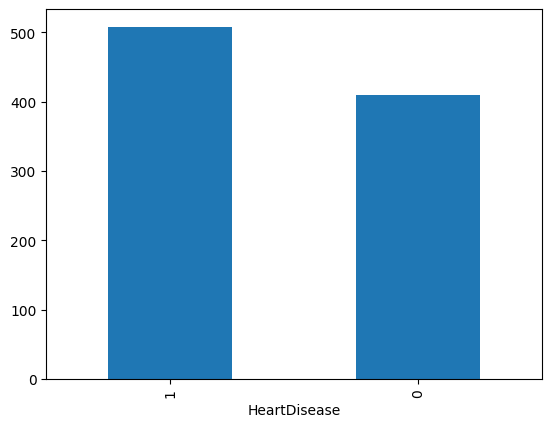

In [17]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

In [18]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


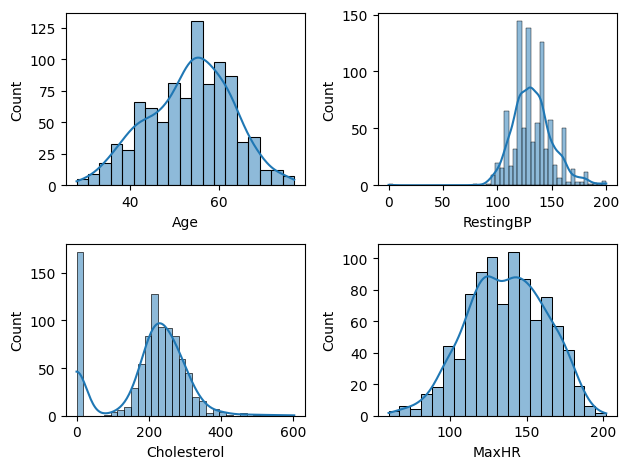

In [19]:
def plotting(var, num):
  plt.subplot(2,2,num)
  sns.histplot(df[var], kde = True)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

plt.tight_layout()

In [20]:
# there is no null values in the data but there are many wrong or inconsistent values in the data means that the resting BP cant be zero
# cholestrol cant be zero as well

In [21]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [22]:
# cleaning the data

In [23]:
chol_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()

In [24]:
chol_mean

np.float64(244.6353887399464)

In [25]:
df['Cholesterol'] = df['Cholesterol'].replace(0, chol_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

<Axes: xlabel='Cholesterol', ylabel='Count'>

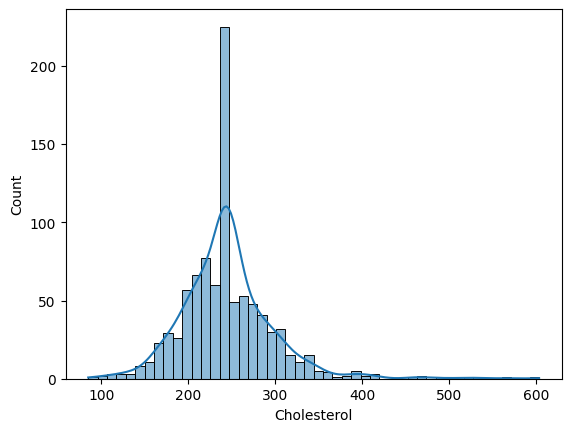

In [26]:
sns.histplot(df['Cholesterol'], kde = True)

In [27]:
rbp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0, rbp_mean)
df['RestingBP'] = df['RestingBP'].round(2)

<Axes: xlabel='RestingBP', ylabel='Count'>

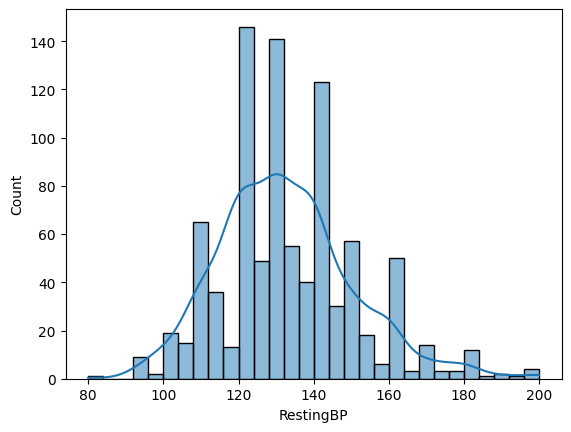

In [28]:
sns.histplot(df['RestingBP'], kde = True)

In [29]:
# Count Plot for the categorical variable

<Axes: xlabel='Sex', ylabel='count'>

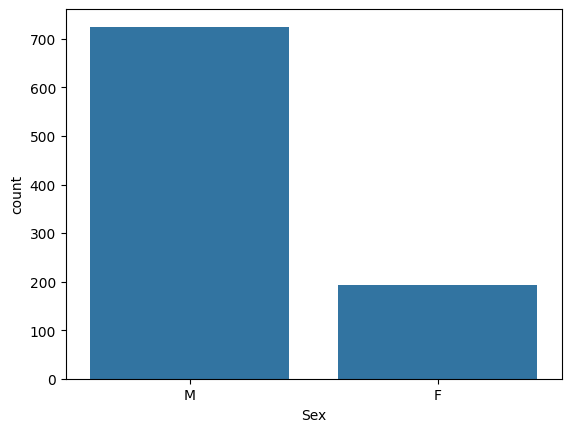

In [30]:
sns.countplot(x = df['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

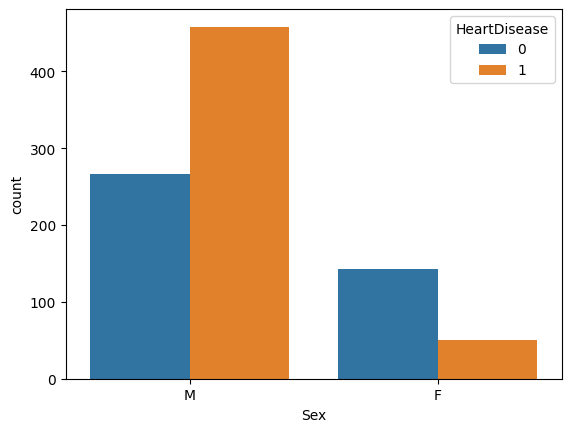

In [31]:
sns.countplot(x = df['Sex'], hue = df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

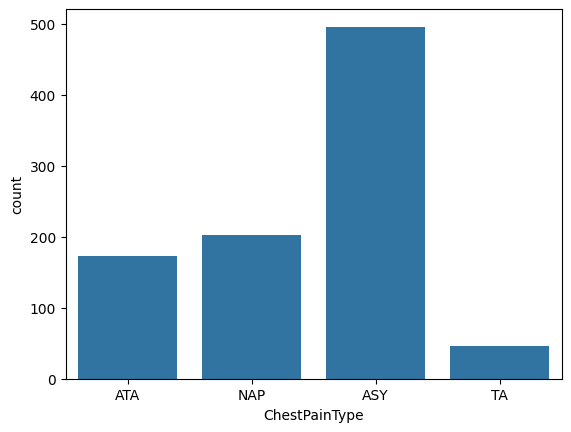

In [32]:
sns.countplot(x = df['ChestPainType'])

<Axes: xlabel='ChestPainType', ylabel='count'>

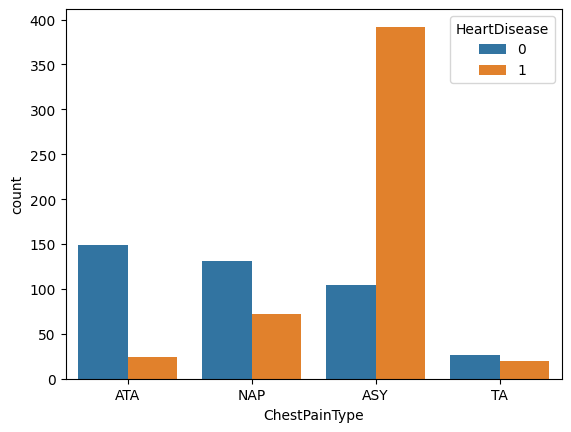

In [33]:
sns.countplot(x = df['ChestPainType'], hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

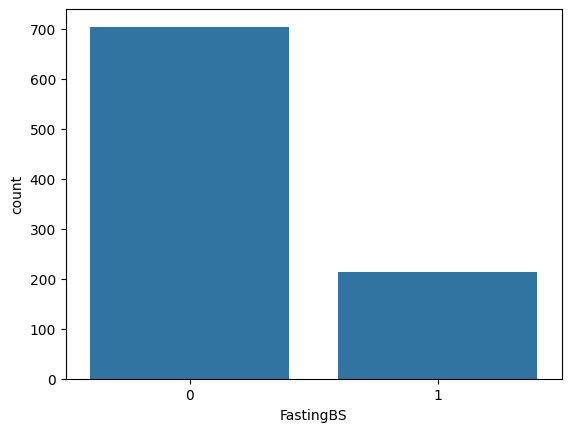

In [34]:
sns.countplot(x = df['FastingBS'])

<Axes: xlabel='FastingBS', ylabel='count'>

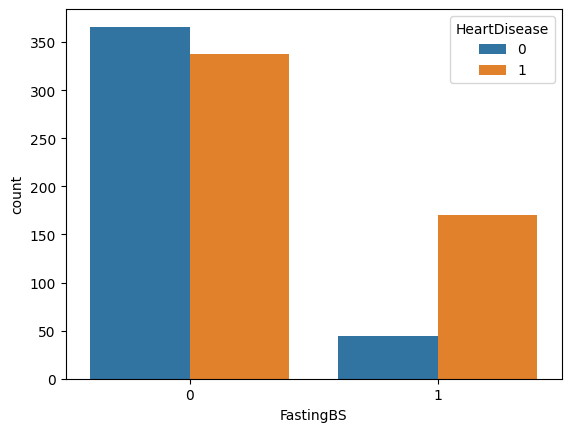

In [35]:
sns.countplot(x = df['FastingBS'], hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

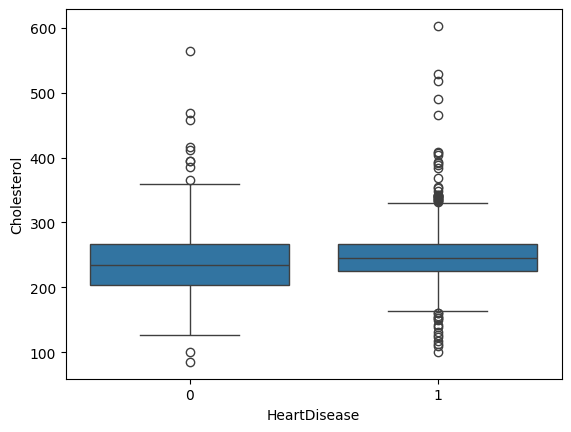

In [36]:
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol', data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

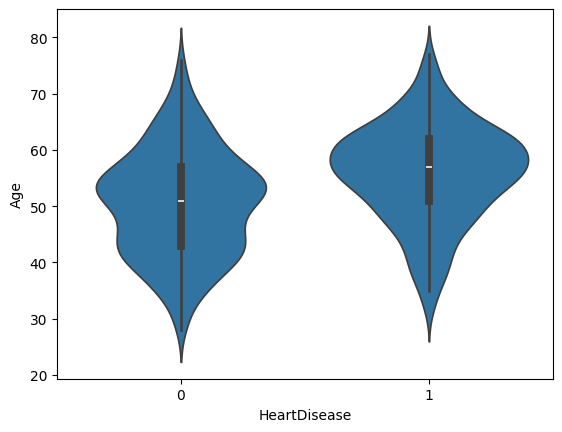

In [37]:
sns.violinplot(x = 'HeartDisease', y = 'Age', data = df)

<Axes: >

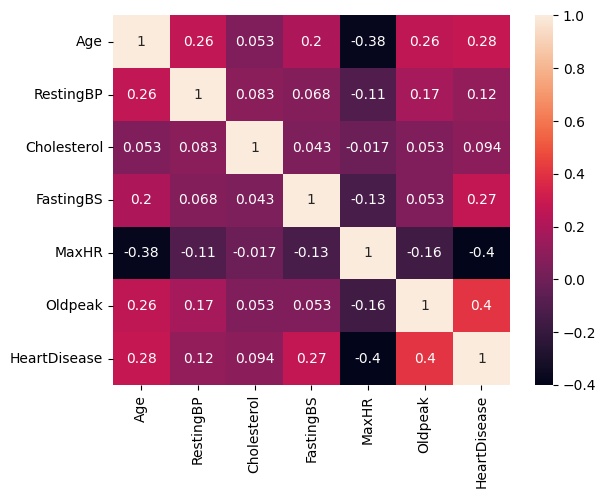

In [38]:
sns.heatmap(df.corr(numeric_only = True), annot= True)

In [39]:
# data pre processing and cleaning

In [40]:
df_encode = pd.get_dummies(df, drop_first= True)

In [41]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [42]:
# df_encode = df_encode.astype(int)

In [43]:
# from sklearn.preprocessing import StandardScaler

In [44]:
# numerical_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

In [45]:
# scaler = StandardScaler()
# df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])

In [46]:
df_encode.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [47]:
df_encode.shape

(918, 16)

In [48]:
#Training models on this data set

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [50]:
X = df_encode.drop('HeartDisease', axis = 1)
y = df_encode['HeartDisease']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [71]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM" : SVC(probability= True)
}

In [72]:
result = []

In [73]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  result.append({
      "model" : name,
      "accuracy" : round(acc,4),
      "f1_score" : round(f1, 4)
  })

In [74]:
result


[{'model': 'Logistic Regression', 'accuracy': 0.8641, 'f1_score': 0.8804},
 {'model': 'KNN', 'accuracy': 0.8533, 'f1_score': 0.8708},
 {'model': 'Naive Bayes', 'accuracy': 0.8533, 'f1_score': 0.8683},
 {'model': 'Decision Tree', 'accuracy': 0.7609, 'f1_score': 0.7864},
 {'model': 'SVM', 'accuracy': 0.8478, 'f1_score': 0.8679}]

In [57]:
# Saving the best model for further use

In [75]:
import joblib
joblib.dump(models['Logistic Regression'], 'Logistic_Regression.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'columns.pkl')

['columns.pkl']